In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
columns=['user_id','order_dt','order_products','order']
df=pd.read_table("C:/Users/Admin/OneDrive/桌面/ds 学期B/course/数据分析/CDNOW_master.txt",names=columns,sep='\s+')#\s+匹配任意个空格

In [4]:
df.head()
#1.日期格式需要转换
#2.存在一个用户一天内购买多次的行为

,user_id,order_dt,order_products,order
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
df.describe()
#1.用户平均每笔订单购买2.4个商品，标准差2.3,75%分位数说明绝大多数购买量不多，围绕在2-3
#2.购买金额反映出大部分订单集中在中小额，30-45左右

,user_id,order_dt,order_products,order
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order           69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


## 数据预处理

In [7]:
df['order_date']=pd.to_datetime(df['order_dt'],format='%Y%m%d')

In [8]:
df['month']=df['order_date'].astype('datetime64[M]')#精度转换

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  int64         
 2   order_products  69659 non-null  int64         
 3   order           69659 non-null  float64       
 4   order_date      69659 non-null  datetime64[ns]
 5   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


## 用户整体消费趋势分析

Text(0.5, 1.0, '每月的消费人数')

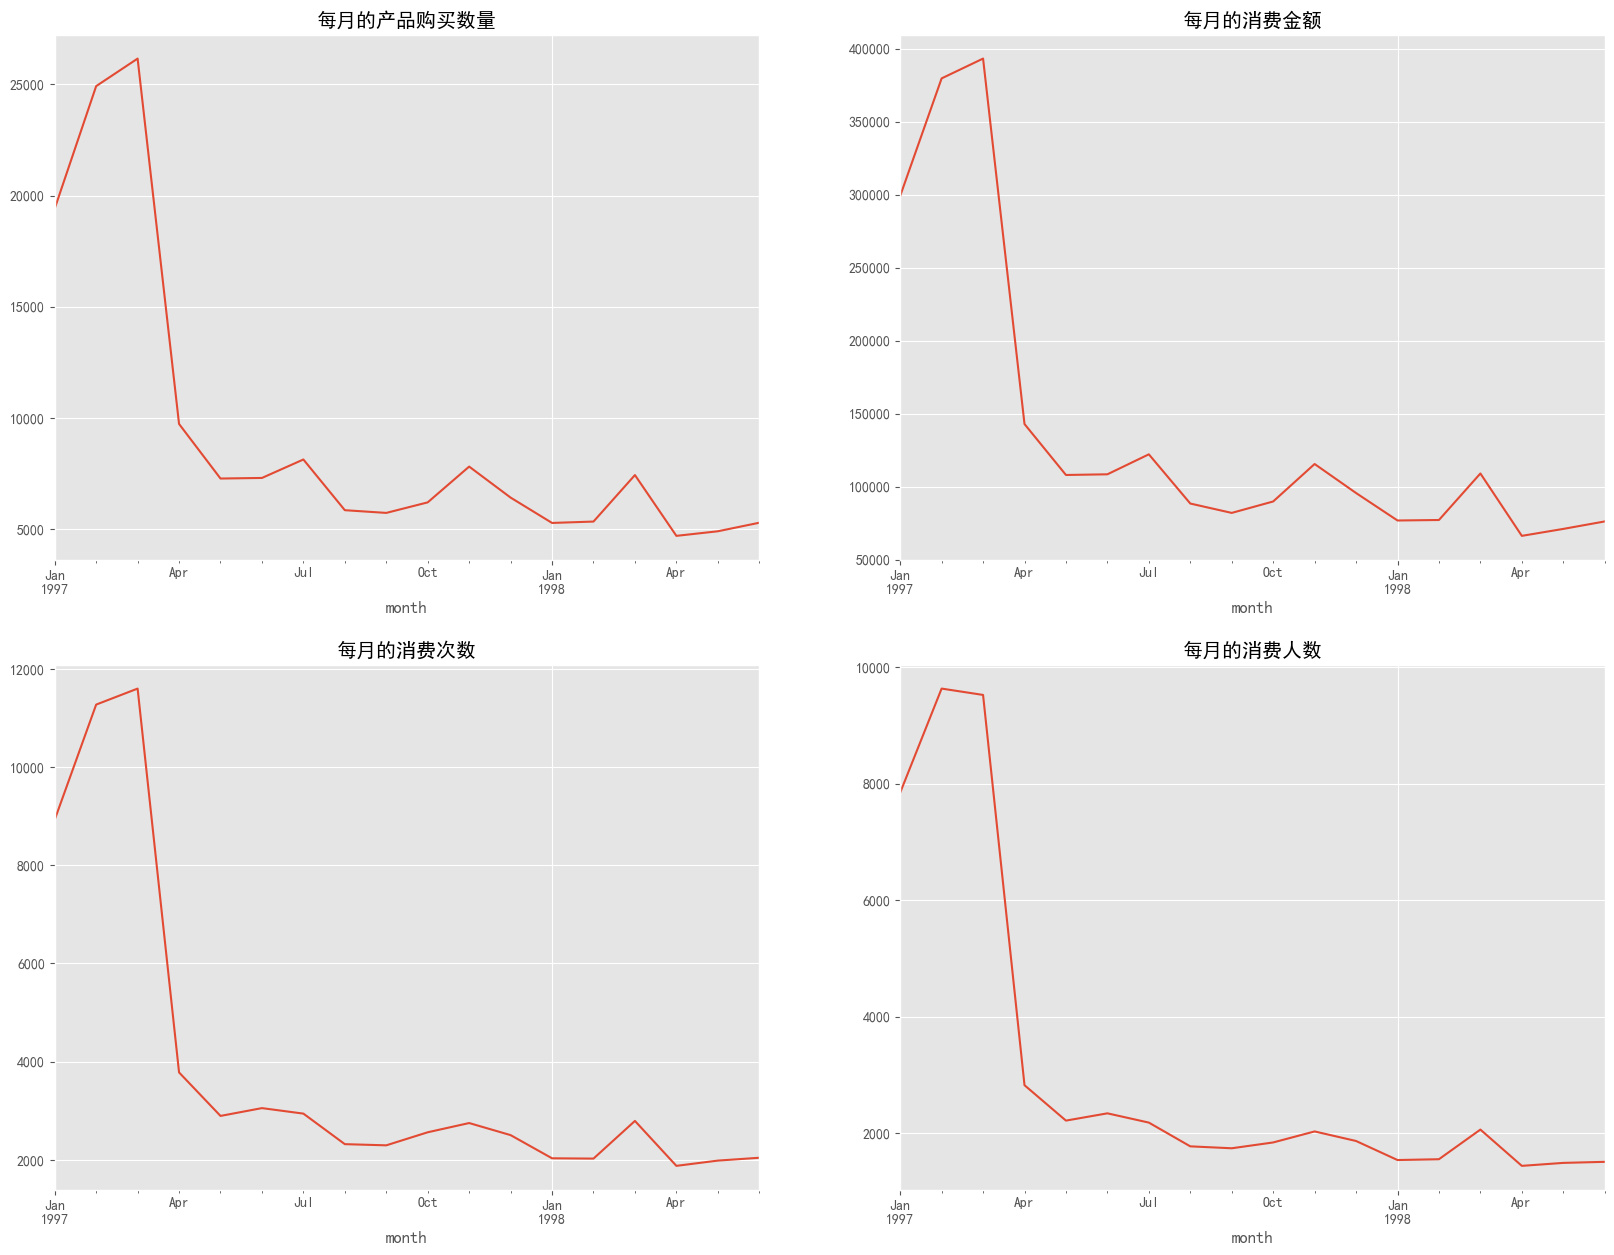

In [10]:
#用户整体消费趋势分析
# 按月份统计产品购买数量，消费金额，消费次数，消费人数
plt.figure(figsize=(20,15))

#每月的产品购买数量 
plt.subplot(221) #两行两列占第一个位置
df.groupby(by='month')['order_products'].sum().plot() #默认折线图
plt.title('每月的产品购买数量')

#每月的消费金额
plt.subplot(222)
df.groupby(by='month')['order'].sum().plot() #默认折线图
plt.title('每月的消费金额')

#每月的消费次数
plt.subplot(223)
df.groupby(by='month')['user_id'].count().plot()
plt.title('每月的消费次数')

#每月的消费人数
plt.subplot(224)
df.groupby(by='month')['user_id'].apply(lambda x:len(x.drop_duplicates())).plot() #默认折线图
plt.title('每月的消费人数')

## 用户个体消费分析

### 1.用户消费金额，消费次数（产品数量）

In [11]:
ug=df.groupby(by='user_id').sum()
print(ug.describe())
print("用户数量：",len(ug))
# 从用户的角度：用户的数量为23570个，每个用户平均买7个，中位数只有3，属于右偏分布

           order_dt  order_products         order
count  2.357000e+04    23570.000000  23570.000000
mean   5.902627e+07        7.122656    106.080426
std    9.460684e+07       16.983531    240.925195
min    1.997010e+07        1.000000      0.000000
25%    1.997021e+07        1.000000     19.970000
50%    1.997032e+07        3.000000     43.395000
75%    5.992125e+07        7.000000    106.475000
max    4.334408e+09     1033.000000  13990.930000
用户数量： 23570


<AxesSubplot:xlabel='order_products', ylabel='order'>

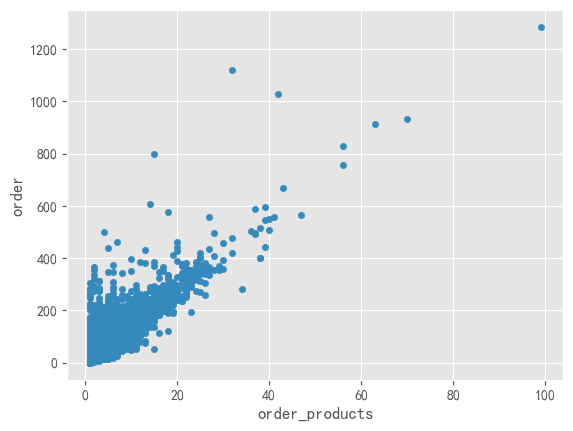

In [12]:
#绘制产品购买量和消费金额散点图
df.plot(kind='scatter',x='order_products',y='order')
#从图中可知，用户的消费金额与购买数量呈线性趋势
#订单的极值点较少（金额>1000或购买量>60）

### 2.用户消费分布图

<AxesSubplot:xlabel='每个uid购买数量', ylabel='Frequency'>

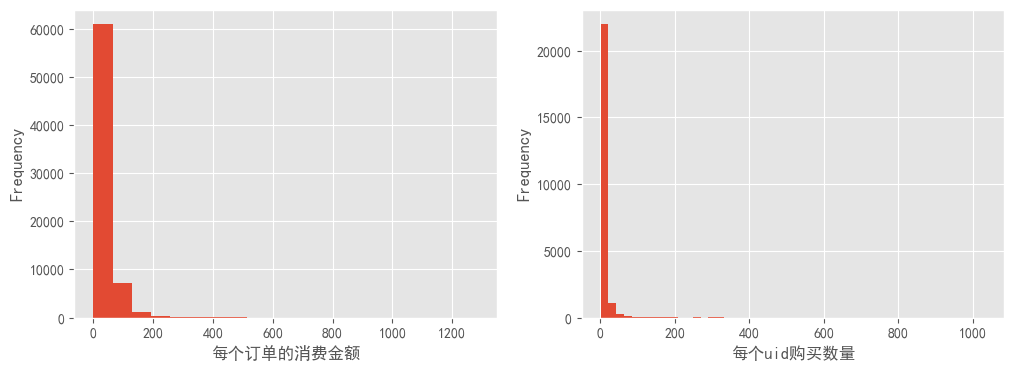

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.xlabel("每个订单的消费金额")
df['order'].plot(kind='hist',bins=20)
#消费金额在100以内的订单数占据大多数

plt.subplot(122)
plt.xlabel('每个uid购买数量')
df.groupby(by=['user_id'])["order_products"].sum().plot(kind='hist',bins=50)
#图二可知每个用户的购买数量非常小，集中在50以内

#两幅图得知，我们的用户主要是消费金额低，购买小于50的用户占大多数

### 3.用户累计消费金额占比分析（用户贡献度）

In [14]:
#进行用户分组，取出消费金额，求和，排序，重置索引
user_cumsum=df.groupby(by='user_id')['order'].sum().sort_values().reset_index()
print(user_cumsum)

       user_id     order
0        10175      0.00
1         4559      0.00
2         1948      0.00
3          925      0.00
4        10798      0.00
...        ...       ...
23565     7931   6497.18
23566    19339   6552.70
23567     7983   6973.07
23568    14048   8976.33
23569     7592  13990.93

[23570 rows x 2 columns]


In [15]:
#每个用户消费金额累加
user_cumsum['amount_cumsum']=user_cumsum['order'].cumsum()

In [16]:
user_cumsum

,user_id,order,amount_cumsum
0,10175,0.00,0.00
1,4559,0.00,0.00
2,1948,0.00,0.00
3,925,0.00,0.00
4,10798,0.00,0.00
...,...,...,...
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70


In [17]:
#消费金额总值
amount_total=user_cumsum['amount_cumsum'].max()
user_cumsum['prop']=user_cumsum.apply(lambda x:x['amount_cumsum']/amount_total,axis=1)
user_cumsum

,user_id,order,amount_cumsum,prop
0,10175,0.00,0.00,0.000000
1,4559,0.00,0.00,0.000000
2,1948,0.00,0.00,0.000000
3,925,0.00,0.00,0.000000
4,10798,0.00,0.00,0.000000
...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404


<AxesSubplot:>

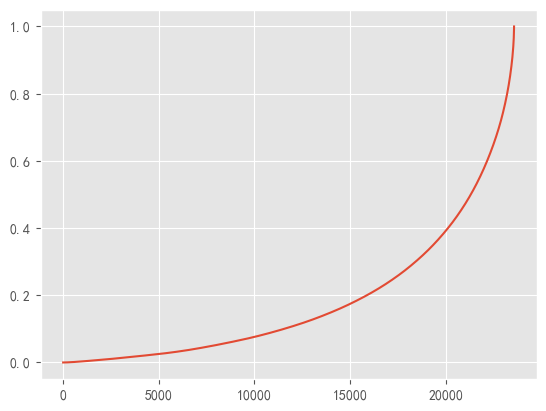

In [18]:
user_cumsum['prop'].plot()
#由图分析可知，前20000名用户贡献总金额40%，剩余3500用户贡献60%（2/8原则）

In [19]:
#总结：
#1.中小型用户，购买量消费金额较低、用户消费单价集中在15元左右
#2.用户消费分布图：中小型用户
#3.用户消费金额贡献率：3500用户贡献率60%

SyntaxError: invalid character '，' (U+FF0C) (2038807048.py, line 2)

## 用户消费行为

### 1.首购时间

<AxesSubplot:>

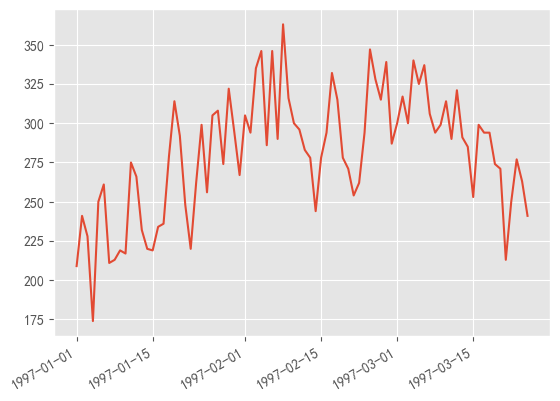

In [21]:
df.groupby(by='user_id')['order_date'].min().value_counts().plot()
#由图可知，首次购买的用户量在1月1日-2月10日呈明显上升趋势，后续回落，可能是公司产品推广力度或者价格调整

### 2.最后一次购买时间

<AxesSubplot:>

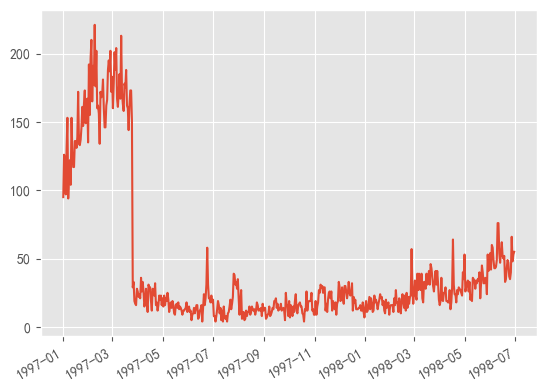

In [22]:
df.groupby(by='user_id')['order_date'].max().value_counts().plot()
#大多数用户最后一次购买时间集中在前三个月，说明缺少忠诚用户
#随着时间的推移，最后一次购买商品的用户量呈现上升趋势

# 用户分层

## 1.构建RFM模型

In [23]:
#透视表的使用（index:相当于groupby,values：取出数据列，aggfunc：key必须存在于values列中）
rfm=df.pivot_table(index='user_id',
                   values=['order_products','order','order_date'],
                   aggfunc={
                       'order_date':'max',#最后一次购买
                       'order_products':'sum',#购买总额
                       'order':'sum'#消费总金额
                   })
rfm.head()

,order,order_date,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [24]:
rfm['R']=-(rfm['order_date']-rfm['order_date'].max())/np.timedelta64(1,'D')   #精确到天，小数点保留以为

In [25]:
rfm.rename(columns={'order_products':'F','order':'M'},inplace=True)
rfm

,M,order_date,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [26]:
#frm计算方式：每一列数据减去数据所在列平均值，若＞=0，设为1，否则设为0
def rfm_fun(x):
    level=x.apply(lambda x:'1'if x>=0 else '0')
    label=level['R']+level['F']+level['M']
    d={
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户',
        
    }
    result=d[label]
    return result
rfm['label']=rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_fun,axis=1)

In [27]:
rfm

,M,order_date,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般发展客户
23567,20.97,1997-03-25,1,462.0,一般发展客户
23568,121.70,1997-04-22,6,434.0,重要发展客户


一般价值客户               M order_date   F      R   label
user_id                                      
912       73.06 1997-03-12   8  475.0  一般价值客户
928      103.36 1997-04-27   9  429.0  一般价值客户
947       74.23 1997-02-09   8  506.0  一般价值客户
990       51.31 1997-01-08   8  538.0  一般价值客户
1126      64.28 1997-01-06   8  540.0  一般价值客户
...         ...        ...  ..    ...     ...
22640     84.56 1997-03-23   8  464.0  一般价值客户
23079     96.70 1997-03-23  10  464.0  一般价值客户
23188     99.96 1997-03-24   8  463.0  一般价值客户
23200    102.54 1997-03-27   8  460.0  一般价值客户
23553     98.58 1997-03-28   8  459.0  一般价值客户

[77 rows x 5 columns]
一般保持客户               M order_date   F      R   label
user_id                                      
16        79.87 1997-09-10   8  293.0  一般保持客户
83       101.68 1998-04-18   8   73.0  一般保持客户
225      105.61 1997-08-01   8  333.0  一般保持客户
360      102.75 1998-05-25   8   36.0  一般保持客户
670      103.53 1998-06-09   9   21.0  一般保持客户
...         ...        ...  ..    ...     .

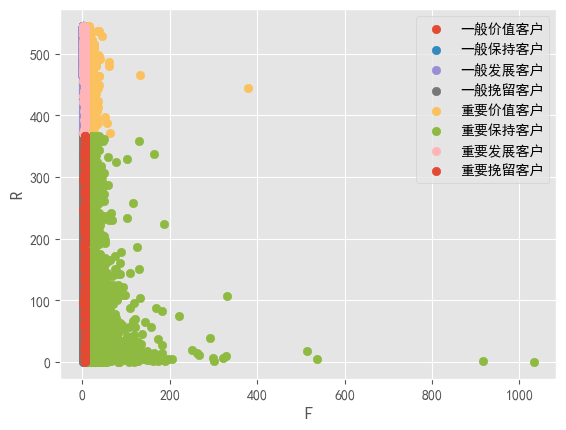

In [28]:
#客户分层可视化
for label,grouped in rfm.groupby(by='label'):
    print(label,grouped)
    x=grouped['F']
    y=grouped['R']
    plt.scatter(x,y,label=label)
    plt.legend()
    plt.xlabel('F')
    plt.ylabel('R')

## 2.新老，活跃，回流用户分析

In [29]:
pivoted_counts=df.pivot_table(
                index='user_id',
                columns='month',
                values='order_date',
                aggfunc='count'

).fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#由于浮点数不直观，转成是否消费过，用0,1表示
df_purchase=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [31]:
#apply:作用于一行或一列数据
#applymap:作用于dataframe中的每一个元素
#map:是一个series函数，无法在dataframe中使用


In [32]:
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#判断是否是新用户，活跃用户，不活跃用户，回流用户
def purchase_status(data):
    status=[] #负责存储18个月的状态  unreg/new/active/unactive/return
    for i in range(18):
        #本月没有消费
        if data[i]==0:
            if len(status)==0:
                status.append('unreg')
            else:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:status.append('unactive')
            pass
        #本月有消费
        else:
            if  len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unreg':
                    status.append('new')
                elif status[i-1]=='unactive':
                      status.append('return')
            
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns)          
            
   

states=df_purchase.apply(purchase_status,axis=1)
states

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [34]:
#用Nan替换unreg
purchase_states_ct=states.replace('unreg',np.nan).apply(lambda x:pd.value_counts(x))
purchase_states_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


<AxesSubplot:xlabel='month'>

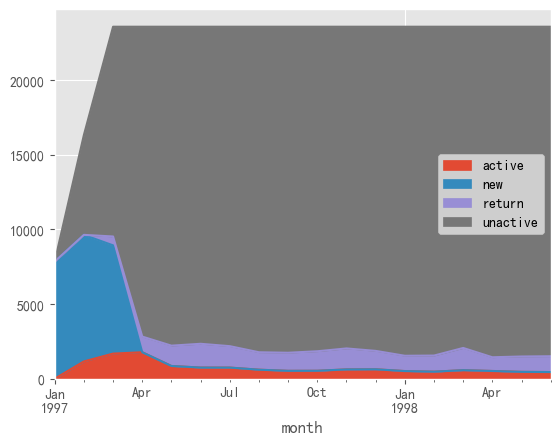

In [35]:
purchase_states_ct.T.fillna(0).plot.area()
#前三个月可知：红色活跃用户和蓝色用户占比较大
#四月份以后，新用户和活跃用户开始下降
#回流用户主要产生在4月以后，呈现稳定趋势，是网站重要客户

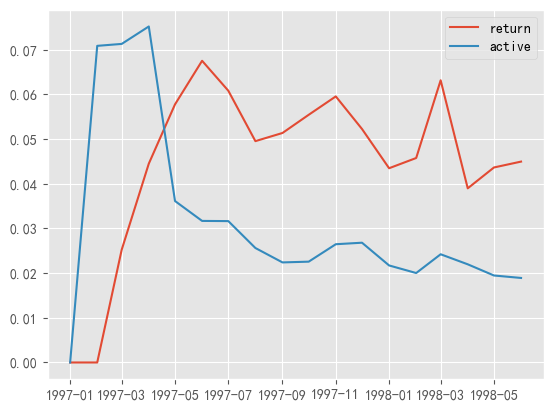

In [36]:
#回流用户的占比
rate=purchase_states_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
rate
plt.plot(rate['return'],label='return')
plt.plot(rate['active'],label='active')
plt.legend()
#回流用户：前五个月，回流用户上涨，之后下降，维持在平均5%
#活跃用户：前三个月活跃用户大量增长，5月份下降，维持在2。5%左右
#网站运营稳定后，回归用户占比大于活跃用户

## 用户的购买周期

In [37]:
#shift函数：将数据移动到一定的位置

In [38]:
#计算购买周期（购买日期的时间差值）
order_diff=df.groupby (by='user_id').apply(lambda x:x['order_date']-x['order_date'].shift())
order_diff.head()
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_date, dtype: object

<AxesSubplot:>

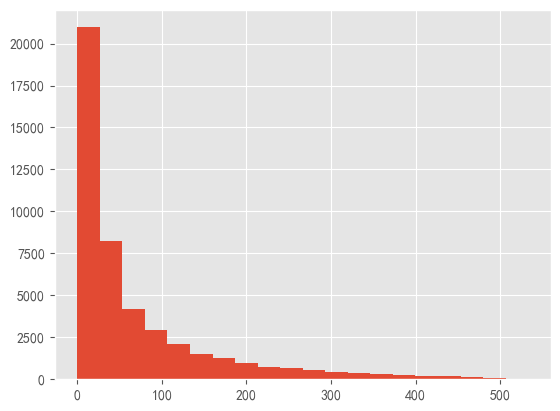

In [39]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)
#平均消费周期为68天
#大多数用户消费周期低于100天
#呈现典型的长尾分布：只有小部分用户的消费周期在200天以上（不积极消费的用户），可以电话回访或赠送优惠券

In [40]:
order_diff

user_id       
1        0           NaT
2        1           NaT
         2        0 days
3        3           NaT
         4       87 days
                   ...  
23568    69654   11 days
         69655   17 days
23569    69656       NaT
23570    69657       NaT
         69658    1 days
Name: order_date, Length: 69659, dtype: timedelta64[ns]

## 用户的生命周期

In [41]:
#计算方式：用户最后一次购买日期-第一次购买日期
order_life=df.groupby(by='user_id')['order_date'].agg(['min','max'])
order_life['life']=order_life.apply(lambda x:x['max']-x['min'],axis=1)

In [42]:
order_life

,min,max,life
user_id,,,
1,1997-01-01,1997-01-01,0 days
2,1997-01-12,1997-01-12,0 days
3,1997-01-02,1998-05-28,511 days
4,1997-01-01,1997-12-12,345 days
5,1997-01-01,1998-01-03,367 days
...,...,...,...
23566,1997-03-25,1997-03-25,0 days
23567,1997-03-25,1997-03-25,0 days
23568,1997-03-25,1997-04-22,28 days


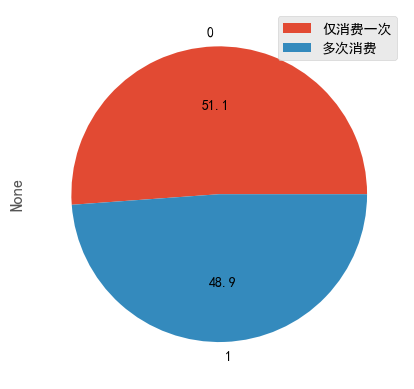

In [43]:
order_life.apply(lambda x:1 if x['life']/np.timedelta64(1,'D')>0 else 0,axis=1).value_counts().plot.pie(autopct='%1.1f')
plt.legend(['仅消费一次','多次消费'])
#一半以上用户仅仅消费了一次，说明运营不好

In [44]:
order_life['life'].describe()
#用户平均生命周期为134天，但中位数为0，验证大多数用户消费了一次，低质量用户
#75%分位数以后得用户，生命周期>294天，属于核心用户，需要着重维持

count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
Name: life, dtype: object

Text(0, 0.5, '用户人数')

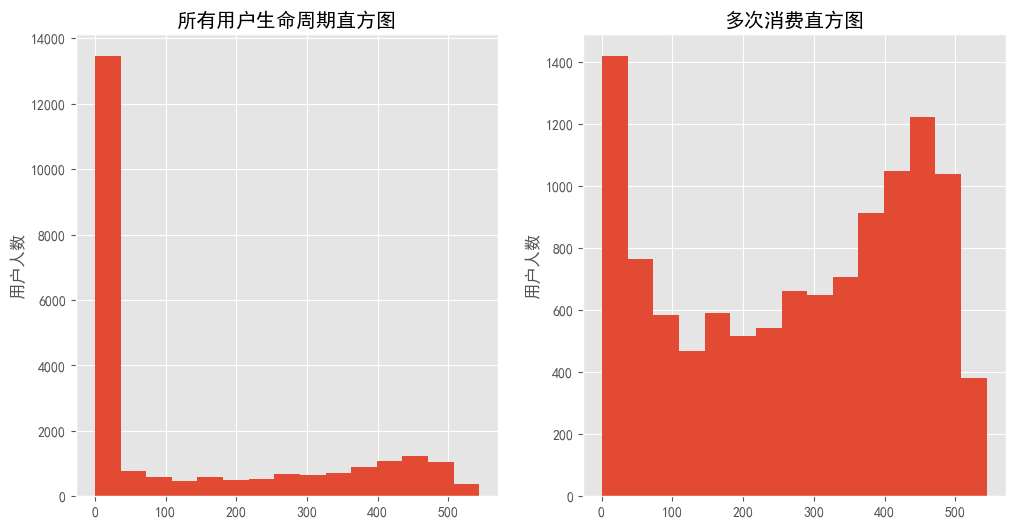

In [52]:
#绘制所有用户生命周期直方图+多次消费
plt.figure(figsize=(12,6))
plt.subplot(121)
(order_life['life']/np.timedelta64(1,'D')).hist(bins=15)
plt.title('所有用户生命周期直方图')
plt.ylabel('用户人数')
plt.subplot(122)
life=order_life[order_life['life']/np.timedelta64(1,'D')>0]['life']/np.timedelta64(1,'D')
life.hist(bins=15)
plt.title('多次消费直方图')
plt.ylabel('用户人数')
#对比可知，第二幅图过滤了生命周期为0的用户，呈现双峰结构
#虽然二图中还有一部分用户的生命周期趋于0天，但是比第一幅图好了很多，虽然进行了多次消费，但是不能长期消费，属于普通用户，可针对性的进行营销推广活动
#少部分用户生命周期集中在300-500天，属于我们的忠实用户，需要大力维护此类用户

# 复购率和回购率

### 复购率分析

In [53]:
#计算方式：在自然月内，购买多次的用户在总消费人数中的占比（若客户在同一天消费了多次，也称为复购用户）
#消费者有三种：消费记录>=2;消费总人数；本月无消费用户
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#复购：1，非复购：0，无消费：nan
rebuy=pivoted_counts.applymap(lambda x:1 if x>1 else np.nan if x==0 else 0)

<AxesSubplot:xlabel='month'>

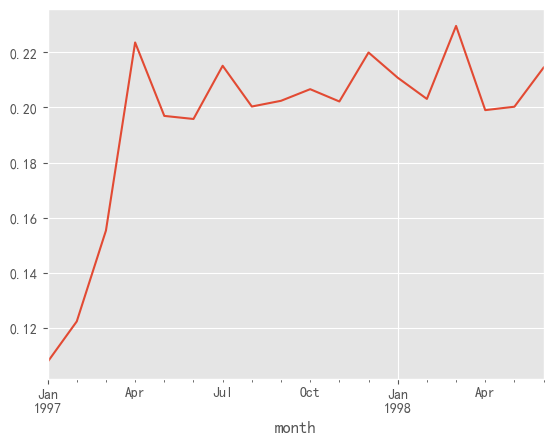

In [58]:
(rebuy.sum()/rebuy.count()).plot()
#前三个月复购率开始上升，后续趋于平稳维持在20%-22%之间
#分析前三个月复购率低的原因可能因为大批新用户仅仅购买一次造成的

### 回购率分析

In [61]:
#计算方式：在一个时间窗口内进行了消费，在下一个窗口内又进行了消费
#0：非回购用户，1：回购用户，nan:当前月份未消费
def back(data):
    status=[]#存储用户回购率状态
    for i in range(17):
        #当前月份消费了
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            elif data[i+1]==0:
                status.append(0)
        else: #当前月份没消费
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status,df_purchase.columns)

purchase_b=df_purchase.apply(back,axis=1)
purchase_b

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


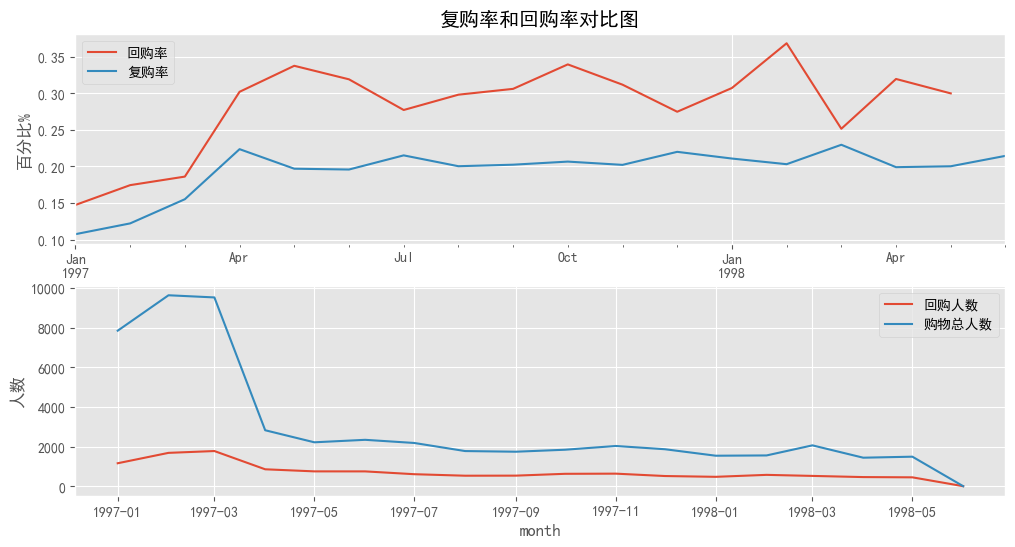

In [66]:
#回购率可视化
plt.figure(figsize=(12,6))
plt.subplot(211)
#回购率 
(purchase_b.sum()/purchase_b.count()).plot(label='回购率')
(rebuy.sum()/rebuy.count()).plot(label='复购率')
plt.legend()
plt.ylabel('百分比%')
plt.title('复购率和回购率对比图')
#回购率：平稳后在30%左右，波动较大
#复购率：低于回购率，平稳后在20%左右，波动性较小
#前三个月无论是回购还是复购，都呈现上升趋势，说明新用户要通过一定时间来变成复购或回购用户
#结合新老用户分析，新客户忠诚度远低于老客户

#回购人数和购物总人数
plt.subplot(212)
plt.plot(purchase_b.sum(),label='回购人数')
plt.plot(purchase_b.count(),label='购物总人数')
plt.xlabel('month')
plt.ylabel('人数')
plt.legend()
#前三个月购物总人数远远大于回购人数，主要因为很多新用户在1月份首次购买
#三个月后，回购人数和购物总数开始稳定，回购人数稳定在1000左右，购物总人数2000左右